## Question (3) Logistic Regression

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import threading
import time
from matplotlib import cm
%matplotlib notebook

with open('data/q3/logisticX.csv') as fp: 
    x=[]
    for line in fp:
        line=line[:-1]
        [x1,x2]=line.split(',')
        x.append(float(x1))
        x.append(float(x2))

with open('data/q3/logisticY.csv') as fp: 
    y=[]
    for line in fp:
        y.append(float(line[:-1]))


X = np.array(x).reshape(100,2)
Y = np.array(y).reshape(100,1)

In [2]:
def normalization(X):
    X_mean = np.mean(X)
    X_var= np.sum((X-X_mean)**2)/len(X)
    X_std_dev= np.sqrt(X_var)
    X_norm = (X- X_mean)/X_std_dev
    return X_norm

X1= X[:,0:1]
X2=X[:,1:2]

X1_norm = normalization(X1)
X2_norm= normalization(X2)

X_norm = np.append(X1_norm, X2_norm, axis = 1)
X_norm = np.append(np.ones((X1_norm.shape[0], 1)), X_norm,axis = 1)


In [3]:
def sigma(V):
    return np.array([1/(1+np.exp(-i)) for i in V])


def gradient(V):
    t= Y-(sigma(V).reshape(V.shape[0],1))
    return np.dot(X_norm.transpose(), t)

def Hessian(Th):
#     t= np.dot(X_norm,theta)
    temp=sigma(np.dot(X_norm,Th))
    D= temp*(np.ones((temp.shape[0],1))-temp)
    t=np.dot(X_norm.T,np.diag(-D[:,0]))
    return (np.dot(t, X_norm))


def grad_des(X_norm):
    theta=np.zeros((3,1))
    for i in range(7):
        G = gradient(np.dot(X_norm,theta))
        H=Hessian(theta)
        H_inv= np.linalg.inv(H)
        theta= theta - np.dot(H_inv, G)
    return theta
        
def plot_data(X_norm, Y0, Y1, res):
    x10= Y0[:,0:1]
    x11=Y0[:,1:2]
    x00= Y1[:,0:1]
    x01=Y1[:,1:2]
    sb.set()
#     sb.set_style("ticks")
    fig, ax = plt.subplots(figsize=(8, 6), dpi= 80)
    ax.scatter(x10,x11, marker="^", color='green', label= "1")
    ax.scatter(x00,x01, marker="P", color='red', label ="0")
    ax.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('x-y')
    Ydash = -(np.dot(X_norm[:,0:2],res[0:2,:]))/res[2][0]
    plt.plot(X_norm[:,1:2],Ydash,color='black')
    plt.show()
        

## (a) Parameters Learned

$\theta_0 = 0.40125316$ \
$\theta_1 = 2.5885477$ \
$\theta_2 = -2.72558849$


In [4]:
res = grad_des(X_norm) 
print(res)
Y0 =np.array([[X_norm[i][1],X_norm[i][2]]  for i in range(len(X_norm)) if Y[i]==0])
Y1 =np.array([[X_norm[i][1],X_norm[i][2]]  for i in range(len(X_norm)) if Y[i]==1])

[[ 0.40125316]
 [ 2.5885477 ]
 [-2.72558849]]


## (b) Decision Boundary

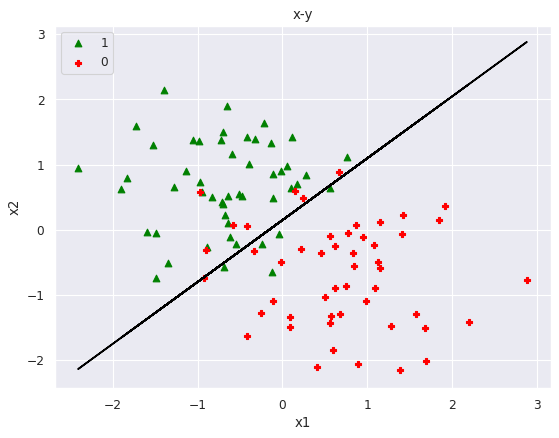

In [5]:
plot_data(X_norm, Y0, Y1, res)